In [1]:
import pandas as pd
from sklearn import svm,datasets

In [4]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower']=iris.target
df['flower']=df['flower'].apply(lambda x:iris.target_names[x])
df[45:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=.3)

In [8]:
model=svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)
# by changing the training examples accuracy changes
# so this method is not reliable 
# for this we use K Fold cross validation


0.9777777777777777

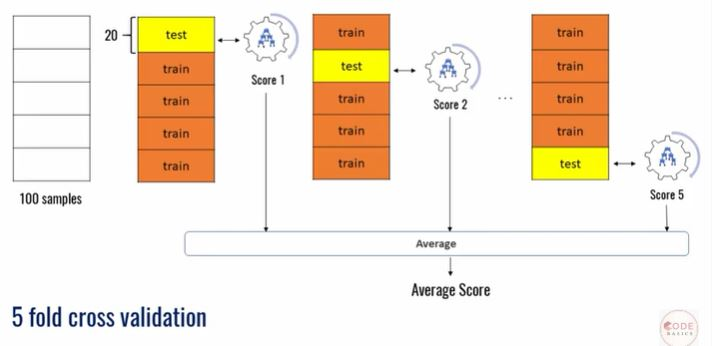

In [9]:
from IPython.display import display, Image
display(Image(filename='kfold.jpg'))

In [23]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)
# Manual 5 Fold cross validation

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [24]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np
kernels=['rbf','linear']
C=[1,10,20]
avg_scores={}
for kval in kernels:
    for cval in C:
        cv_scores=cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[kval+'_'+str(cval)]=np.average(cv_scores)
        
avg_scores
# K Fold cross validation using loop
# but for large no of parameters we need large no of loops
# so we use grid search
# GRID SEARCH PERFORM THE SAME OPERATION AS ABOVE CODE
# IN A SINGLE LINE

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

# Grid Search CV

In [28]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']},cv=5,return_train_score=False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00217538, 0.00078993, 0.00080624, 0.00059872, 0.00099516,
        0.00079761]),
 'std_fit_time': array([7.61515024e-04, 3.95284872e-04, 4.03473828e-04, 4.88850269e-04,
        3.34806245e-06, 3.98805704e-04]),
 'mean_score_time': array([0.00080724, 0.00019999, 0.00039873, 0.00038805, 0.00060825,
        0.00039883]),
 'std_score_time': array([0.00040387, 0.00039997, 0.00048835, 0.00047558, 0.00049786,
        0.00048846]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [30]:
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002175,0.000762,0.000807,0.000404,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000790,0.000395,0.000200,0.000400,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000806,0.000403,0.000399,0.000488,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000599,0.000489,0.000388,0.000476,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000995,0.000003,0.000608,0.000498,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [37]:
df[['param_C','param_kernel','mean_test_score']]
# displaying oly relevant information

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [38]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score',
 'scorer_',
 'scoring',
 '

In [39]:
clf.best_score_

0.98

In [40]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

# Conclusion
* Best params for best score is
* {'C': 1, 'kernel': 'rbf'}

# Discussion
* instead of C values 1,10,20 if we have to test on 100s of value of C then computation cost increase.So to solve this problem we use Randomized Search CV

# RandomizedSearchCV
* choose random combination of parameter from the given parameters

In [54]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']},
     cv=5,
     return_train_score=False,
    n_iter=2)
rs.fit(iris.data,iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.98
1,1,linear,0.98


# Different Models with different Hyperparameters

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [64]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    

In [66]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
